# SMS Spam Detection using TensorFlow

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score, precision_score
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset 
#loading dataset
data = pd.read_csv("spam.csv", encoding='latin-1')

In [3]:
#first 5 rows 
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#size of the dataset
data.shape

(5572, 5)

In [5]:
#summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#checking null values
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
# Drop the 3 unnamed columns with null values. 
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [8]:
#rename columns v1 to 'label' and v2 to 'Text'
data = data.rename(columns = {'v1': 'Label','v2': 'Text'})

In [9]:
#encode the target variable as it is in string form
data['label_enc'] = data['Label'].map({'ham' : 0, 'spam' : 1})

In [10]:
data.head()

,Label,Text,label_enc
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


<AxesSubplot:xlabel='Label', ylabel='count'>

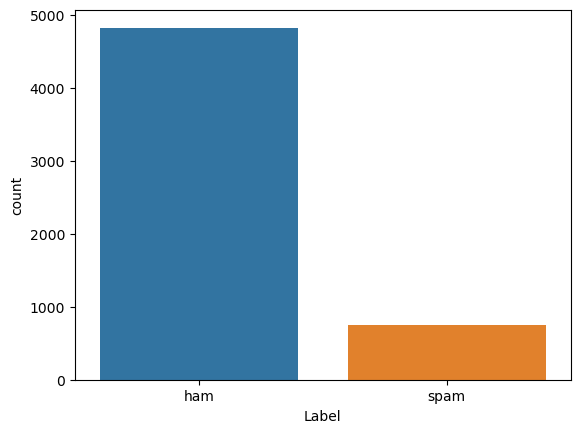

In [11]:
#EDA
#visualizing the target column
sns.countplot(data['Label'])

In [ ]:
# from the above plot, we can see that 'ham' data is comparatively higher than 'spam' data. 
# Since we are going to use embeddings in our deep learning model, we need not balance the data

In [12]:
# Find average number of words in all the sentences in SMS data
avg_words_len=round(sum([len(i.split()) for i in data['Text']])/len(data['Text']))
print(avg_words_len)

15


In [13]:
# Finding total no of unique words in corpus
s = set()
for sent in data['Text']:
    for word in sent.split():
        s.add(word)

total_words_length =len(s)
print(total_words_length)

15585


In [14]:
#Train test split
X = data['Text']
Y = data['label_enc']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4457,), (4457,), (1115,), (1115,))

In [ ]:
#Model Training 

In [ ]:
#Model 1: Creating custom Text vectorization and embedding layers:

In [ ]:
#Text vectorization is the process of converting text into a numerical representation
#A word embedding is a learned representation of text in which words with related meanings have similar representations

In [16]:
from keras.layers import TextVectorization

MaxTokens = total_words_length
OutputLen = avg_words_len

text_vec = TextVectorization(max_tokens = MaxTokens, standardize='lower_and_strip_punctuation', output_mode='int', output_sequence_length=OutputLen)
text_vec.adapt(X_train)

In [17]:
embedding_layer = keras.layers.Embedding(input_dim=MaxTokens,output_dim=128,embeddings_initializer='uniform',input_length=OutputLen)

In [18]:
input_layer = keras.layers.Input(shape=(1,), dtype=tf.string)
vec_layer = text_vec(input_layer)
embedding_layer_model = embedding_layer(vec_layer)
x = keras.layers.GlobalAveragePooling1D()(embedding_layer_model)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(32, activation='relu')(x)
output_layer = keras.layers.Dense(1, activation='sigmoid')(x)

model_1 = keras.Model(input_layer, output_layer)
 
model_1.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(label_smoothing=0.5), metrics=['accuracy'])

In [19]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 15)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 15, 128)           1994880   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128  

In [20]:
history_1 = model_1.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), validation_steps=int(0.2*len(X_test)))

Epoch 1/5
140/140 [==============================] - 5s 31ms/step - loss: 0.6041 - accuracy: 0.9116 - val_loss: 0.5770 - val_accuracy: 0.9749
Epoch 2/5
140/140 [==============================] - 4s 30ms/step - loss: 0.5701 - accuracy: 0.9865 - val_loss: 0.5733 - val_accuracy: 0.9812
Epoch 3/5
140/140 [==============================] - 4s 29ms/step - loss: 0.5657 - accuracy: 0.9960 - val_loss: 0.5725 - val_accuracy: 0.9821
Epoch 4/5
140/140 [==============================] - 4s 26ms/step - loss: 0.5642 - accuracy: 0.9980 - val_loss: 0.5722 - val_accuracy: 0.9848
Epoch 5/5
140/140 [==============================] - 4s 30ms/step - loss: 0.5634 - accuracy: 0.9991 - val_loss: 0.5724 - val_accuracy: 0.9803


<AxesSubplot:>

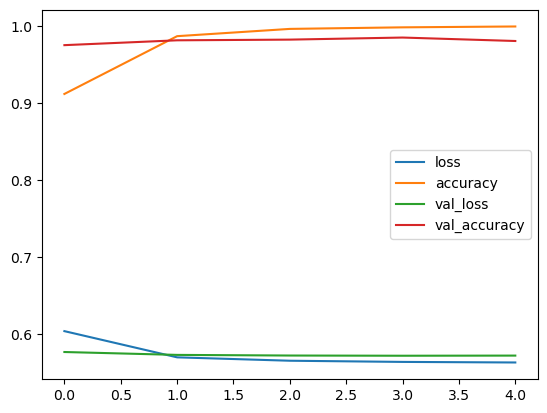

In [21]:
pd.DataFrame(history_1.history).plot()

In [22]:
y_preds = np.round(model_1.predict(X))
accuracy = accuracy_score(Y, y_preds)
precision = precision_score(Y, y_preds)
print('Accuracy: ', accuracy )
print('Precision: ', precision )

175/175 [==============================] - 0s 2ms/step
Accuracy:  0.9956927494615937
Precision:  0.9986206896551724


In [ ]:
#Model -2 Bidirectional LSTM

In [ ]:
#Bidirectional LSTM (Long short-term memory) is made up of two LSTMs, one accepting input in one direction and the other 
#in the other direction. 

In [23]:
input_layer = keras.layers.Input(shape=(1,), dtype=tf.string)
vec_layer = text_vec(input_layer)
embedding_layer_model = embedding_layer(vec_layer)
bi_lstm = keras.layers.Bidirectional(keras.layers.LSTM(64, activation='tanh', return_sequences=True))(embedding_layer_model)
lstm = keras.layers.Bidirectional(keras.layers.LSTM(64))(bi_lstm)
flatten = keras.layers.Flatten()(lstm)
dropout = keras.layers.Dropout(.1)(flatten)
x = keras.layers.Dense(32, activation='relu')(dropout)
output_layer = keras.layers.Dense(1, activation='sigmoid')(x)
model_2 = keras.Model(input_layer, output_layer)

In [24]:
model_2.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 15)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 15, 128)           1994880   
                                                                 
 bidirectional (Bidirection  (None, 15, 128)           98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                           

In [26]:
history_2 = model_2.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), validation_steps=int(0.2*len(X_test)))

Epoch 1/5
140/140 [==============================] - 15s 64ms/step - loss: 0.0591 - accuracy: 0.9825 - val_loss: 0.1210 - val_accuracy: 0.9785
Epoch 2/5
140/140 [==============================] - 8s 55ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.1156 - val_accuracy: 0.9785
Epoch 3/5
140/140 [==============================] - 7s 53ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.1187 - val_accuracy: 0.9794
Epoch 4/5
140/140 [==============================] - 9s 63ms/step - loss: 3.7187e-05 - accuracy: 1.0000 - val_loss: 0.1255 - val_accuracy: 0.9803
Epoch 5/5
140/140 [==============================] - 9s 63ms/step - loss: 2.0526e-05 - accuracy: 1.0000 - val_loss: 0.1311 - val_accuracy: 0.9803


<AxesSubplot:>

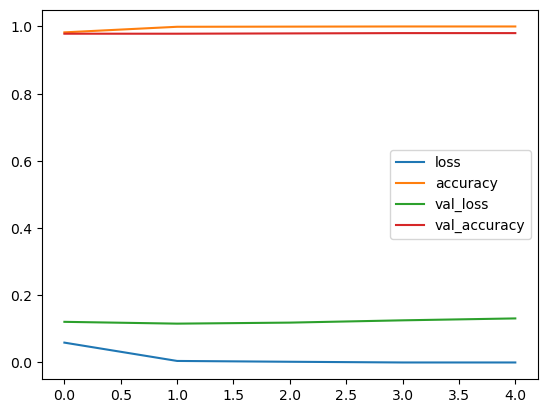

In [27]:
pd.DataFrame(history_2.history).plot()

In [28]:
y_preds = np.round(model_2.predict(X))
accuracy = accuracy_score(Y, y_preds)
precision = precision_score(Y, y_preds)
print('Accuracy: ', accuracy )
print('Precision: ', precision )

175/175 [==============================] - 3s 7ms/step
Accuracy:  0.9960516870064609
Precision:  0.9986244841815681


In [29]:
#Model -3 Transfer Learning with USE Encoder

In [30]:
#Transfer learning is a machine learning approach in which a model generated for one job is utilized as the foundation for
# a model on a different task.
#The Universal Sentence Encoder converts text into high-dimensional vectors that may be used for text categorization, 
# semantic similarity, and other natural language applications.

In [31]:
import tensorflow_hub as hub
model_3 = keras.Sequential()
 
#Universal Sentence Encoder layer from tfhub
use_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                           trainable=False,
                           input_shape=[],
                           dtype=tf.string,
                           name='USE')
model_3.add(use_layer)
model_3.add(keras.layers.Dropout(0.2))
model_3.add(keras.layers.Dense(64, activation=keras.activations.relu))
model_3.add(keras.layers.Dense(1, activation=keras.activations.sigmoid))

In [32]:
model_3.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [33]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                32832     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [34]:
history = model_3.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), validation_steps=int(0.2*len(X_test)))

Epoch 1/5
140/140 [==============================] - 5s 19ms/step - loss: 0.2988 - accuracy: 0.9123 - val_loss: 0.1153 - val_accuracy: 0.9695
Epoch 2/5
140/140 [==============================] - 2s 16ms/step - loss: 0.0808 - accuracy: 0.9791 - val_loss: 0.0697 - val_accuracy: 0.9767
Epoch 3/5
140/140 [==============================] - 2s 17ms/step - loss: 0.0575 - accuracy: 0.9816 - val_loss: 0.0582 - val_accuracy: 0.9794
Epoch 4/5
140/140 [==============================] - 2s 18ms/step - loss: 0.0463 - accuracy: 0.9854 - val_loss: 0.0569 - val_accuracy: 0.9803
Epoch 5/5
140/140 [==============================] - 2s 17ms/step - loss: 0.0427 - accuracy: 0.9881 - val_loss: 0.0529 - val_accuracy: 0.9821


In [35]:
y_preds = np.round(model_3.predict(X))
accuracy = accuracy_score(Y, y_preds)
precision = precision_score(Y, y_preds)
print('Accuracy: ', accuracy )
print('Precision: ', precision )

175/175 [==============================] - 2s 9ms/step
Accuracy:  0.9883345297918162
Precision:  0.9671232876712329


In [ ]:
#All 3 models deliver good results. All of them have greater than 98% accuracy.